<a href="https://colab.research.google.com/github/Vikas5050/Underwater-Image-Processing/blob/main/HE%26DCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

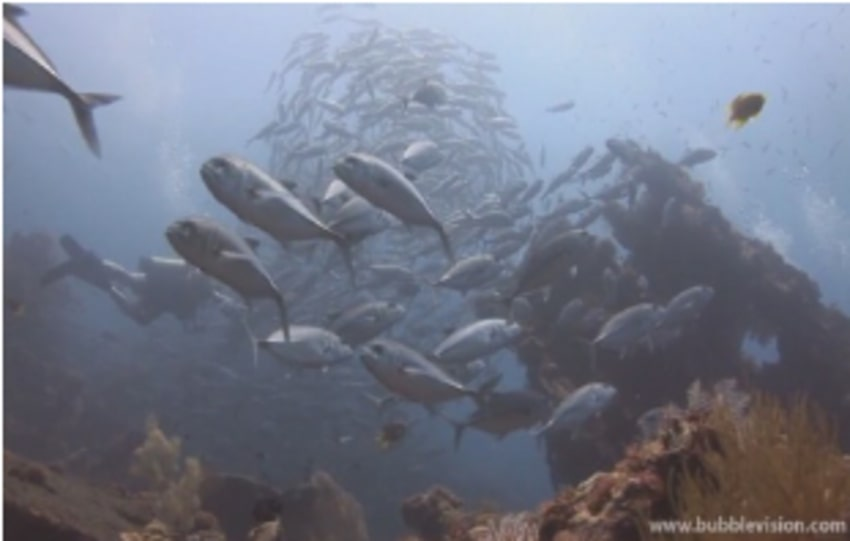

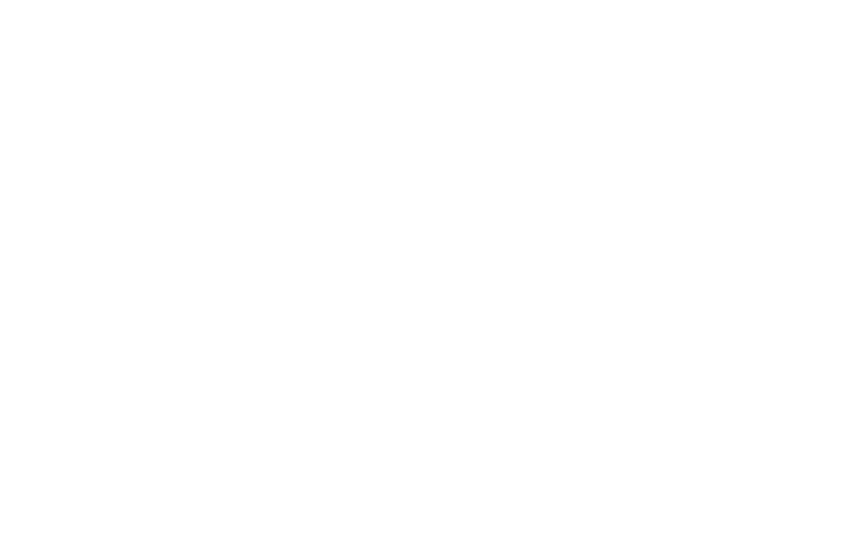

In [ ]:
import cv2
import numpy as np

def dark_channel_prior(img, window_size=15):
    """Compute the dark channel prior of an image."""
    min_channel = np.min(img, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size))
    dark_channel = cv2.erode(min_channel, kernel)
    return dark_channel

def underwater_enhancement(img, beta=1.2, omega=0.7, epsilon=0.001, t0=0.05):
    """Enhance underwater image using Dark Channel Prior method."""
    # Estimate the transmission map
    dark_channel = dark_channel_prior(img)
    transmission_map = 1 - omega * dark_channel

    # Refine transmission map
    transmission_map = np.maximum(transmission_map, t0)

    # Recover the scene radiance
    scene_radiance = np.zeros_like(img, dtype=np.float32)
    for i in range(3):
        scene_radiance[:,:,i] = (img[:,:,i].astype(np.float32) - beta) / transmission_map + beta

    # Clip the values to ensure they are within the valid range [0, 255]
    scene_radiance = np.clip(scene_radiance, 0, 255)

    # Convert back to uint8
    scene_radiance = scene_radiance.astype(np.uint8)

    return scene_radiance

# Load the underwater image
image_path = 'underwater_image.jpg'  # Replace with your image path
underwater_image = cv2.imread(image_path)

# Enhance the underwater image
enhanced_image = underwater_enhancement(underwater_image)

# Display the original and enhanced images
from google.colab.patches import cv2_imshow
cv2_imshow( underwater_image)
cv2_imshow( enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


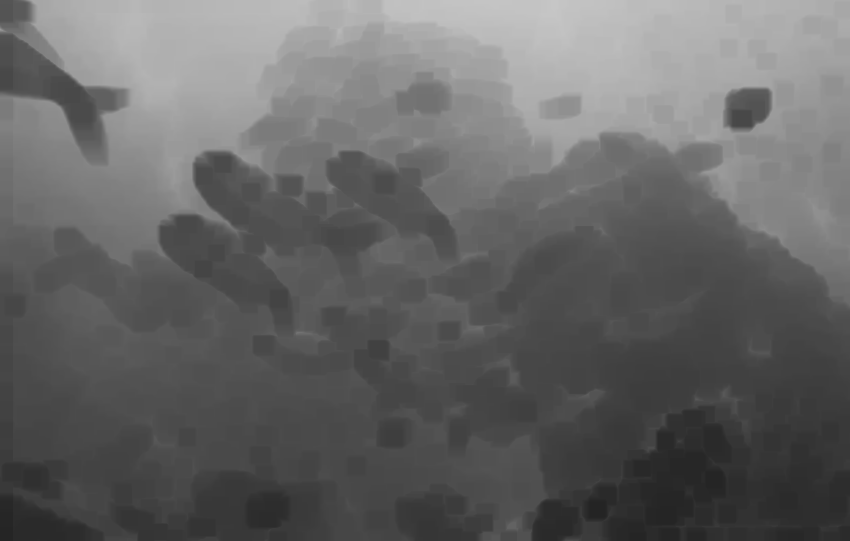

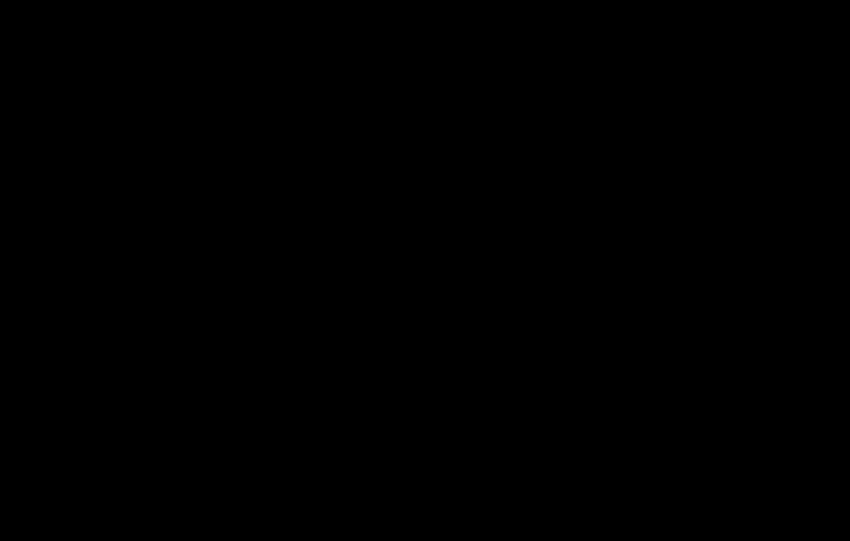

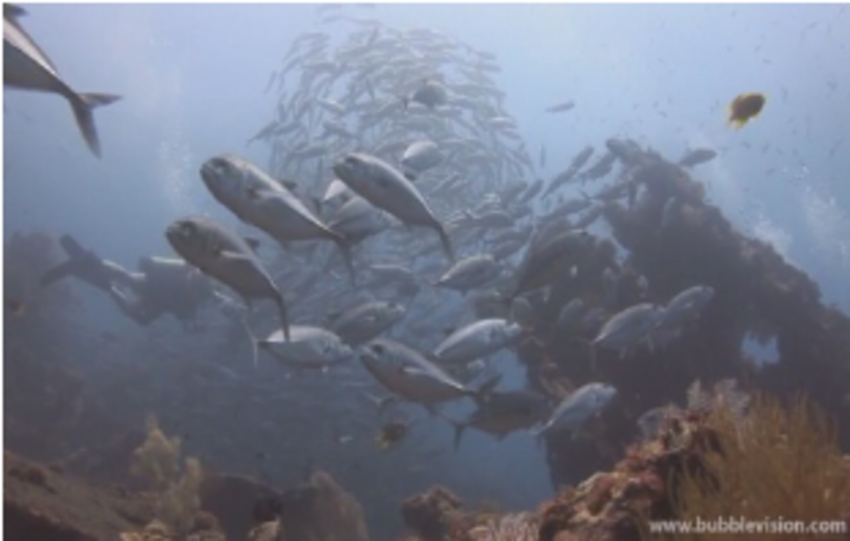

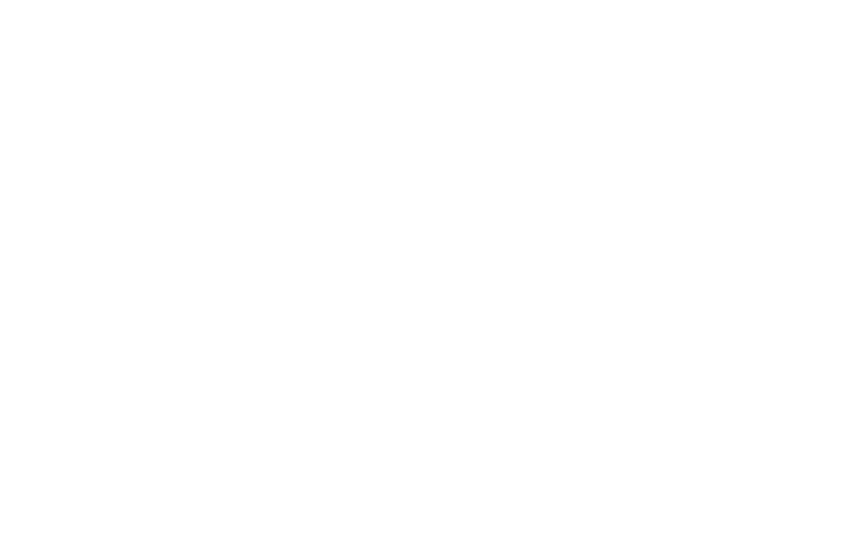

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def dark_channel_prior(img, window_size=15):
    """Compute the dark channel prior of an image."""
    min_channel = np.min(img, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size))
    dark_channel = cv2.erode(min_channel, kernel)
    return dark_channel

def underwater_enhancement(img, beta=1.0, omega=0.75, epsilon=0.0001, t0=0.1):
    """Enhance underwater image using Dark Channel Prior method."""
    # Estimate the transmission map
    dark_channel = dark_channel_prior(img)
    transmission_map = 1 - omega * dark_channel

    # Refine transmission map
    transmission_map = np.maximum(transmission_map, t0)

    # Visualize dark channel and transmission map (optional)
    cv2_imshow( dark_channel)
    cv2_imshow( transmission_map)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Recover the scene radiance
    scene_radiance = np.zeros_like(img, dtype=np.float32)
    for i in range(3):
        scene_radiance[:,:,i] = (img[:,:,i].astype(np.float32) - beta) / transmission_map + beta

    # Clip the values to ensure they are within the valid range [0, 255]
    scene_radiance = np.clip(scene_radiance, 0, 255)

    # Convert back to uint8
    scene_radiance = scene_radiance.astype(np.uint8)

    return scene_radiance

# Load the underwater image
image_path = 'underwater_image.png'  # Replace with your image path
underwater_image = cv2.imread(image_path)

# Enhance the underwater image
enhanced_image = underwater_enhancement(underwater_image)

# Display the original and enhanced images
cv2_imshow( underwater_image)
cv2_imshow( enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


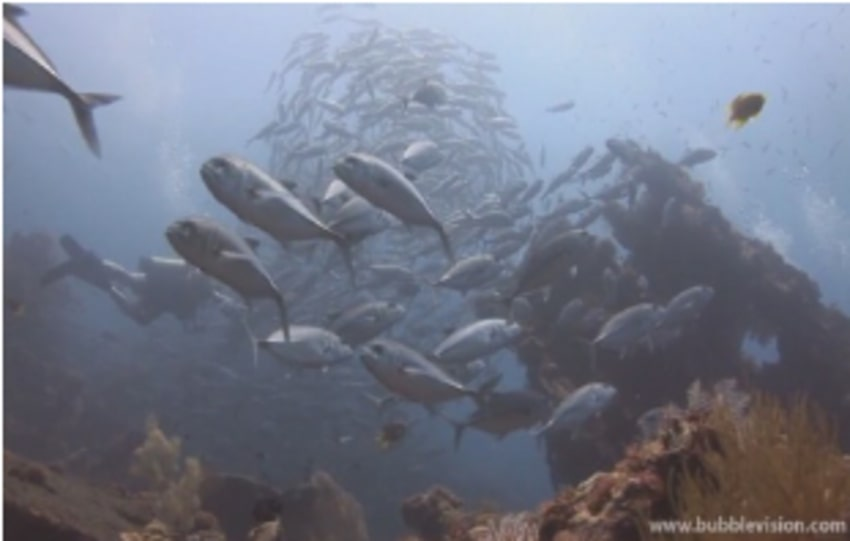

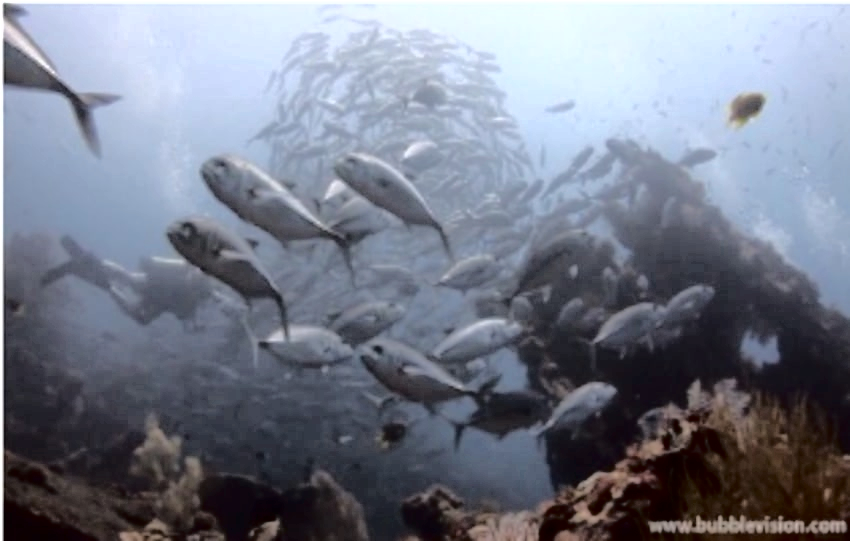

In [ ]:
import cv2

def underwater_enhancement_hist_eq(img):
    """Enhance underwater image using Histogram Equalization."""
    # Convert image to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Split the LAB image into channels
    l, a, b = cv2.split(lab)

    # Apply histogram equalization to the L-channel
    l_eq = cv2.equalizeHist(l)

    # Merge the equalized L-channel with the original A and B channels
    enhanced_lab = cv2.merge((l_eq, a, b))

    # Convert the enhanced LAB image back to BGR color space
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Load the underwater image
image_path = 'underwater_image.jpg'  # Replace with your image path
underwater_image = cv2.imread(image_path)

# Enhance the underwater image using histogram equalization
enhanced_image = underwater_enhancement_hist_eq(underwater_image)

# Display the original and enhanced images
from google.colab.patches import cv2_imshow
cv2_imshow( underwater_image)
cv2_imshow( enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


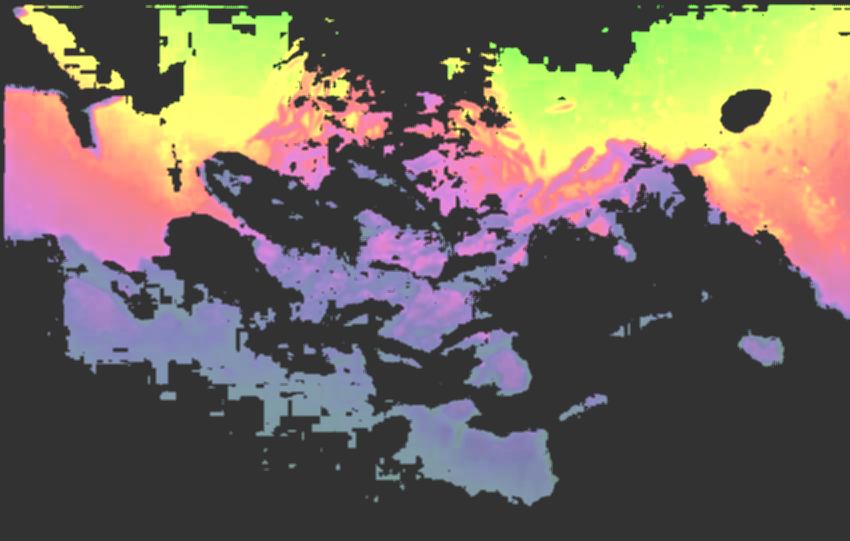

In [ ]:
import cv2
import numpy as np

def underwater_image_enhancement(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range of blue color in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    enhanced_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert the image back to RGB
    enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_HSV2BGR)
    # Apply Gaussian blur to the enhanced image
    ksize = (3,3)
    sigmaX = 10
    enhanced_image = cv2.GaussianBlur(enhanced_image, ksize, sigmaX)

    # Correct the contrast and brightness of the enhanced image
    alpha = 1.5
    beta = 50
    enhanced_image = cv2.addWeighted(enhanced_image, alpha, np.zeros(image.shape, image.dtype), 0, beta)
    return enhanced_image

# Test the function
image_path = '/content/underwater_image.jpg'
enhanced_image = underwater_image_enhancement(image_path)
from google.colab.patches import cv2_imshow
cv2_imshow( enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

def DCP(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract the V channel
    V = hsv[:,:,2]

    # Compute the dark channel
    dark_channel = np.min(V, axis=2)

    # Compute the transmission map
    transmission_map = 1 - (dark_channel / 255) ** 0.95

    # Compute the atmospheric light
    atmospheric_light = np.percentile(dark_channel, 99)

    # Compute the global atmospheric light
    global_atmospheric_light = np.max(atmospheric_light)

    # Compute the transmission map under the constraint of the atmospheric light
    transmission_map = np.maximum(transmission_map, global_atmospheric_light / 255)

    # Compute the corrected image
    corrected_image = image.copy()
    corrected_image = corrected_image * transmission_map[:,:,np.newaxis] + (1 - transmission_map)[:,:,np.newaxis] * global_atmospheric_light

    # Clip pixel values to [0, 255]
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

    return corrected_image

# Test the function
image_path = 'underwater_image.jpg'
image = cv2.imread(image_path)
enhanced_image = DCP(image)
from google.colab.patches import cv2_imshow
cv2_imshow('Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
import cv2
import numpy as np

def DCP(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract the V channel
    V = hsv[:,:,2]

    # Compute the dark channel
    dark_channel = np.min(V, axis=1)

    # Compute the transmission map
    transmission_map = 1 - (dark_channel / 255) ** 0.95

    # Compute the atmospheric light
    atmospheric_light = np.percentile(dark_channel, 99)

    # Compute the global atmospheric light
    global_atmospheric_light = np.max(atmospheric_light)

    # Compute the transmission map under the constraint of the atmospheric light
    transmission_map = np.maximum(transmission_map, global_atmospheric_light / 255)

    # Compute the corrected image
    corrected_image = image.copy()
    corrected_image = corrected_image * transmission_map[:,:,np.newaxis] + (1 - transmission_map)[:,:,np.newaxis] * global_atmospheric_light

    # Clip pixel values to [0, 255]
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

    return corrected_image

# Test the function
image_path = 'underwater_image.jpg'
image = cv2.imread(image_path)
enhanced_image = DCP(image)
from google.colab.patches import cv2_imshow
cv2_imshow('Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed